# Week 4: Data Visualization with Matplotlib

Welcome to the final week! In this lesson, we're going to dive into data visualization. Charts and graphs are a great way to communicate information quickly, and good visuals can sometimes carry as much weight as rigorous statistical analysis. Data viz isn't just eye candy -- it can help you pick up on patterns and structure in data that more numeric analysis might miss. 

The main Python data plotting library is Matplotlib, which has the goal of making "easy things easy and hard things possible," as the [website says](http://matplotlib.org/).

Matplotlib graphics are organized in Figures, with each figure containing one or more subplots (often confusingly refered to as axes), which in turn can have different things plotted in them. 

In this lesson more than in the previous ones, there will be a slight difference depending on whether you are using the IPython Notebook or not.

#### With the IPython Notebook

The IPython Notebook is designed to work well with Matplotlib; specifically, it can embed the graphics you create right in the Notebook itself, just like any other output.

To set a Notebook to display graphics inline, run the 

    %matplotlib inline
    
command in a cell before you start generating graphics. 

#### Without the IPython Notebook

Displaying graphics through IDLE or the command line isn't as easy. To show your most recent graphics in an interactive window, run the command
    plt.show()

However, once you close that window, you can't easily reopen it -- you have to replot the graphic in order to show it again. However, if you've assigned the graphic to a variable, you can still save it to a file, as we'll show below.

If you're following these lessons outside of the IPython Notebook, the easiest thing to do is to run *plt.show()* after every block of code, before where the graphic appears in this Notebook. I've tried to organize it so that each block only contains one graphic, so that using *show()* will yield the same results.

### Let's get started!

First, we import **matplotlib.pyplot**, the main plotting object within Matplotlib. By convention, and for ease of typing, pyplot is aliased as **plt**.

In [1]:
import matplotlib.pyplot as plt

We'll also import **numpy**, the numeric computation Python package. Pandas uses numpy under the hood, which is why we won't generally work with it directly for data analysis. It has some functions which will be useful as inputs into our plots, though. By convention, numpy is imported as **np**

In [2]:
import numpy as np

If you're in the IPython Notebook, use this command to make the plots appear as cell outputs:

In [3]:
%matplotlib inline

## Our first plots

Matplotlib has multiple types of plots, but most of the time you'll use one of the basic types:

* Line plots: draw lines between specified points

* Scatter plots: put markers at the specified x and y coordinates

* Bar charts: Draw bars of different height for each value or category.

* Histograms: use bars to represent the distribution of the data

First, we'll create some sample data and then plot it. For the x values, we'll simply take the integers from 0 to 99. For the y values, we'll create one random value for each x. Note that numpy has its own random number generators, in its **.random** module:

In [4]:
# Prepare some data:
x_data = range(100)
y_data = [np.random.random() for x in x_data]

Now to plot the data! Remember that if you're not using IPython in inline mode, add **plt.show()** after each plotting command.

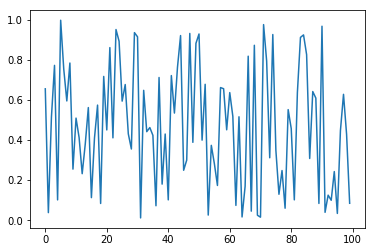

In [5]:
# A line plot:
plt.plot(x_data, y_data)

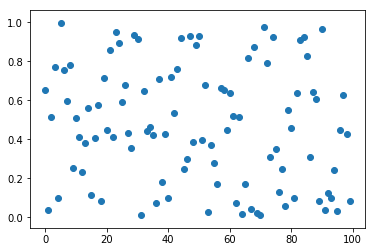

In [6]:
# A scatter plot:
plt.scatter(x_data, y_data)

<BarContainer object of 100 artists>

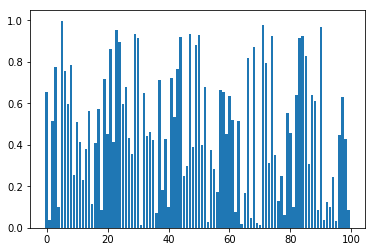

In [7]:
# A bar chart:
plt.bar(x_data, y_data)

(array([19.,  6.,  7.,  8., 13., 10., 11.,  8.,  6., 12.]),
 array([0.01147194, 0.11009962, 0.20872731, 0.30735499, 0.40598267,
        0.50461036, 0.60323804, 0.70186573, 0.80049341, 0.89912109,
        0.99774878]),
 <a list of 10 Patch objects>)

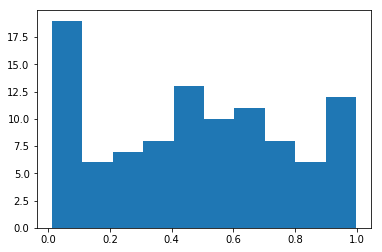

In [8]:
# A histogram
plt.hist(y_data)

All of these follow the same basic form: the type of chart is determined by the function you call; the first argument is a list of x values, and the second argument (for everything but a histogram) is the y values. Matplotlib creates a figure with a default size, and chooses axis ranges to display. Blue is the default color.

For some simple exploratory visualization, this may be all you need! But to make better-quality graphics, you can customize all of the above, and more.

## Figures and subplots:

The root object for all Matplotlib graphics is the Figure. Each figure contains one or more subplots (also sometimes called axes) which contain the actual graphics. Using figures and subplots allows you to hold multiple graphics in memory at the same time and to access or modify their properties. 

Let's replicate the basic line chart using figures and subplots:

In [9]:
# First we generate some new random data:
x_data = range(100)
y_data = [np.random.random() for x in x_data]

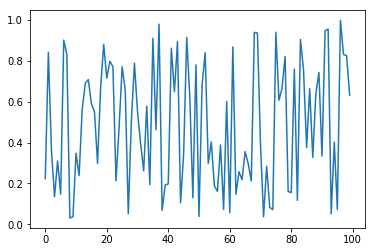

In [10]:
fig = plt.figure() # Create the new figure
ax = fig.add_subplot(111) # Create a single subplot within the figure
ax.plot(x_data, y_data) # Plot the data in the subplot

The *plt.figure()* function creates a new figure, which we assign to *fig*. Next, the figure's *add_subplot(...)* method creates a new subplot within that figure, which is assigned to the variable *ax*. 

The number in *.add_subplot(...)* can be kind of confusing. Its purpose is to tell Matplotlib how to divide a figure into subplots: the first (hundreds) digit is the number of rows of subplots to have, the second digit is the number of columns of subplots, and the third digit is the index of the specific subplot to plot in, counting first across and then down. We'll cover subplots in more detail later on; for now, if you want your figure to have only one subplot, remember '111' -- it means that the figure will have only one row and one column of subplots, and hence only one single subplot. (Unlike most everything in Python, subplots are counted from 1, not 0).

You can set figure-wide properties when you create the figures. The one you'll probably use most often is *figsize*, which sets the size of the figure, in inches. The size in pixels will depend on DPI (dots per inch) which defaults to 80. If you're using the IPython Notebook, that will determine the size and shape of the image that's created. If you're using *.show()*, you'll notice that you can resize the image dynamically. However, that won't change the underlying object.

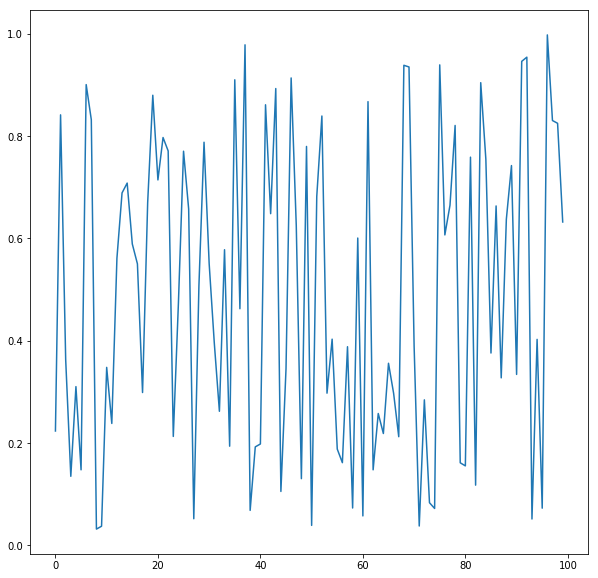

In [11]:
fig = plt.figure(figsize=(10,10)) # Set the figure size to be 10 inches 
ax = fig.add_subplot(111)
ax.plot(x_data, y_data)

No matter whether you're using the Notebook or another Python interpreter, you can export the image using its *.savefig(...)* method. The main argument you provide is the file name or path. If it's just the file name, it will save in the same directory as the notebook. Alternatively, you can provide a full path to wherever on your system you want to save it.

In [12]:
fig.savefig("Test_small.png")

By default, Matplotlib saves graphics at a DPI (dots per inch) of 80. You can specify a higher DPI, which will result in a higher-resolution file.

In [13]:
fig.savefig("Test_large.png", dpi=300)

Matplotlib automatically saves the file in the correct format based on the extension you give the file name, for a wide variety of formats. For example:

In [14]:
fig.savefig("Test.pdf") # Standard PDF

In [15]:
fig.savefig("Test.svg") # Vector image

### Manipulating figures and axes:

Besides being able to save your graphics, the main reason to use explicit figures and subplots is to be able to manipulate and add labels to the axis lines of your plots.

In [16]:
# Some more random data
x_data = np.linspace(0, 10, 21)
y_data = [np.random.randint(0, 10) for x in x_data] # Now we pick a random integer between 0 and 10.

Most methods to manipulate subplots usually take the form of *.set_* + whatever property it is you want to add. Three you'll probably use most often are:

* *.set_title(...)* -- Give the subplot a heading
* *.set_xlabel(...)* -- Give a label to the X axis
* *.set_ylabel(...)* -- Give a label to the Y axis

For example:

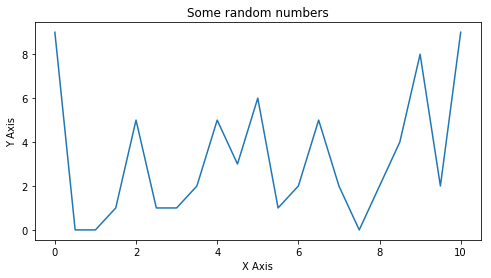

In [17]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.set_title("Some random numbers")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.plot(x_data, y_data)


If you're not satisfied with the default axis ranges generated for your plot, you can set them yourself using the *.set_xlim(...)* and *.set_ylim(...)*, passing your own start and stop points:

(-1, 10)

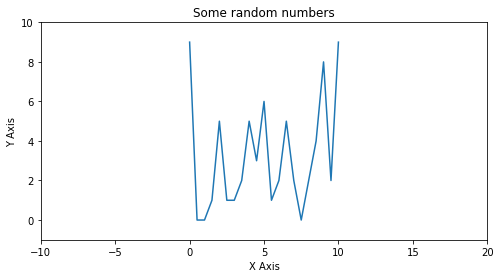

In [18]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.set_title("Some random numbers")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.plot(x_data, y_data)

ax.set_xlim(-10, 20)
ax.set_ylim(-1, 10)

(5, 10)

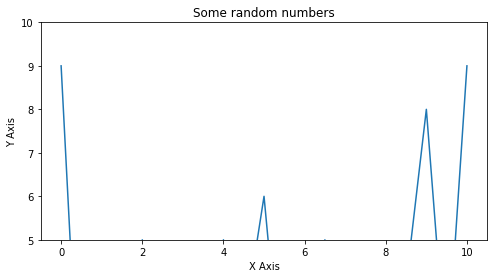

In [19]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.set_title("Some random numbers")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.plot(x_data, y_data)

ax.set_ylim(5, 10)

### Styling plots

The colors and formatting of lines, points etc. can also be changed. This gets especially important when you're trying to ploot several lines on the same chart, or convey some other information using color and shape. The right design can help you tell a story with your visualization, and make it immediately clear what data each line or marker is associated with.

Matplotlib doesn't limit you to plotting only one data series on each subplot. In these examples, we'll generate two sets of data, plot them both, and style them differently.

In [20]:
# Some new data, one x axis with two sets of y points:
x_data = range(20)
y1_data = [np.random.randint(0, 10) for x in x_data]
y2_data = [np.random.randint(0, 10) for x in x_data]

Matplotlib will apply some default styling when you make several plots within the same subplot:

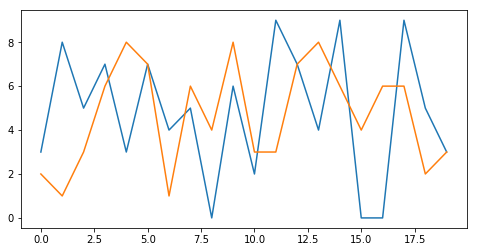

In [21]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data)
ax.plot(x_data, y2_data)

To set the color of lines directly, you assign a color to the plot function's *c* (for color) argument. Matplotlib has single-letter abbreviations for commonly-used colors. For example, 'b' is Blue, 'r' is Red, 'g' is Green, and 'k' is blacK. For the full list, see:

http://matplotlib.org/api/colors_api.html#module-matplotlib.colors

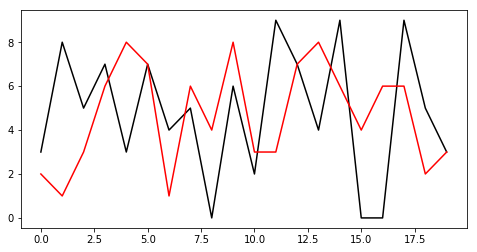

In [22]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, c='k') # Black
ax.plot(x_data, y2_data, c='r') # Red

There are other line properties we can set. *linewidth* is the width of the line, just as you expect (the default width is 1). *linestyle* is how to draw the line, other than as a solid line. Each possible linestyle is associated with a set of characters that are meant to resemble the actual pattern. For example, the symbol for a dashed line is '--'. For the full list, see: http://matplotlib.org/api/artist_api.html#module-matplotlib.lines

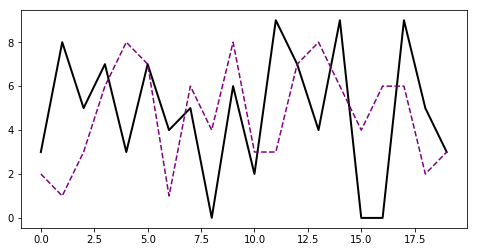

In [27]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, c='k', linewidth=2.0) # Black
ax.plot(x_data, y2_data, c='purple', linestyle='--') # Red

Not only can we overlay different lines, we can even overlay different kinds of plots -- such as line plots and scatter plots.

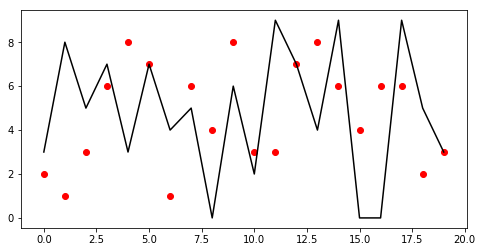

In [29]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, c='k') 
ax.scatter(x_data, y2_data, c='r') 

Notice that the axis ranges have changed, since Matplotlib puts more space around scatterplots than line plots.

If we want to turn on grid lines, we pass True to the subplot's *grid* method:

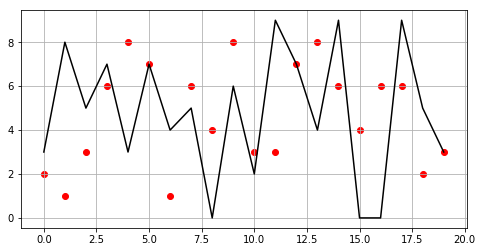

In [30]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, c='k') 
ax.scatter(x_data, y2_data, c='r')
ax.grid(True)

Another way to create a scatterplot is to pass an extra argument to the *plot(...)* method, right after the data. This argument is a character representing the shape to use as the scatter plot marker. For example, '+' marks each datapoint with a small cross. 

Let's try that out, and demonstrate that we can even combine a scatterplot with a histogram (though I'm not sure if you would ever actually need to):

(array([3., 0., 1., 3., 2., 3., 1., 3., 1., 3.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

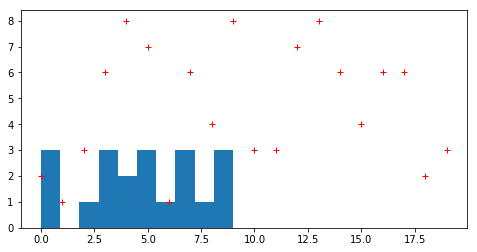

In [31]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x_data, y2_data, '+', c='r')# Plot using red '+' signs.
ax.hist(y1_data)

Another property scatterplots can have is *s*, the size of the points. If we pass a number, all the points will be scaled equally:

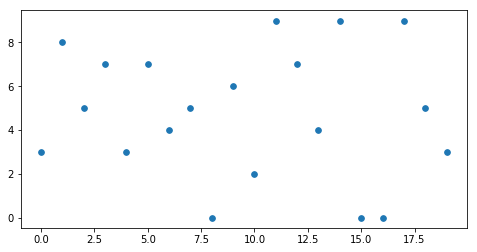

In [32]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.scatter(x_data, y1_data, s=32)

If you pass a list of numbers, each point will be scaled based on the corresponding item in the list. This lets you add another dimension to your visualization. 

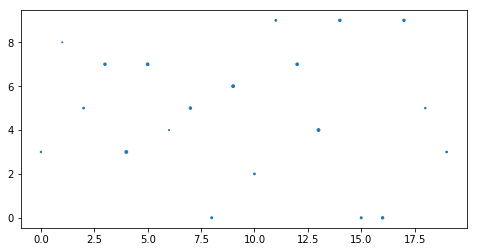

In [33]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.scatter(x_data, y1_data, s=y2_data)

However, We may need to scale that dimension somehow, to make it a better size value. The points above are rather small, so let's try multiplying each by 16 to get the size:

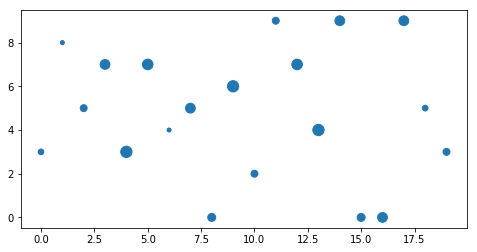

In [37]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.scatter(x_data, y1_data, s=[16 * y for y in y2_data])

Color works the same way, though of course we need to convert data to a color somehow. This can be useful for categorical data. For this example, let's plot points with y2 below 5 in red, and points above 5 in green. Let's also remove the outline line, to make the color stand out more.

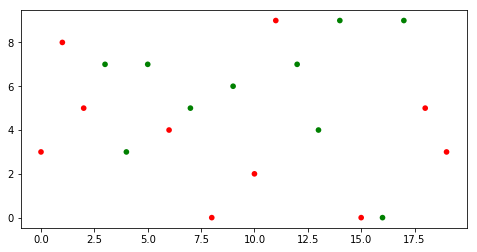

In [38]:
# Map numbers to colors:
colors = []
for y in y2_data:
    if y < 5: colors.append('r')
    else: colors.append('g')

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.scatter(x_data, y1_data, s=32, c=colors, linewidths=0)
        

## Legends

It's important to be able to label your data and make sure that your audience (and you!) know what each part of a chart means. In this section, we'll go over adding legends to your charts.

Let's create another round of random data

In [39]:
# Some more new data
x_data = range(20)
y1_data = [np.random.randint(0, 10) for x in x_data]
y2_data = [np.random.randint(0, 10) for x in x_data]

For quick and dirty plotting, we don't need to explicitly create a figure and subplot:

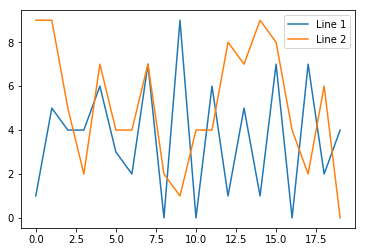

In [40]:
plt.plot(x_data, y1_data)
plt.plot(x_data, y2_data)
plt.legend(["Line 1", "Line 2"])

The *.legend(...)* method can take as an argument a list of strings to label the lines with, in the order they were plotted.

It works the same when we do use figures and subplots:

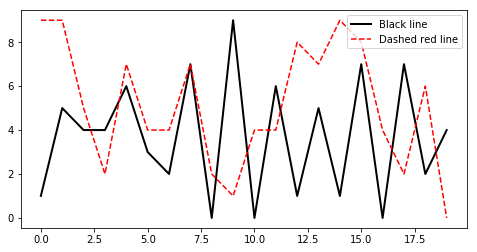

In [41]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, c='k', linewidth=2.0) 
ax.plot(x_data, y2_data, c='r', linestyle='--')

ax.legend(["Black line", "Dashed red line"])

Note that the legend automatically uses the line design we specified in the plot.

What if we want to locate the legend somewhere else? We can use the *loc* argument, which can take either a string or a number to specify which preset location to put the legend in. The full list of options is available in the documentation here:

http://matplotlib.org/users/legend_guide.html#legend-location

But for example:


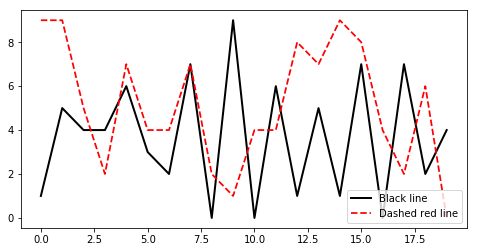

In [47]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, c='black', linewidth=2.0) 
ax.plot(x_data, y2_data, c='red', linewidth=1.75, linestyle='--')

ax.legend(["Black line", "Dashed red line"], loc='lower right')

We can also get finer control over the legend location by passing it a tuple of (x, y) coordinates for the legend location, where the coordinates are a fraction of the figure size. If we provide a value greater than 1, we can actually place the legend outside the boundaries of the subplot, like this:

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, c='k', linewidth=2.0) 
ax.plot(x_data, y2_data, c='r', linestyle='--')

ax.legend(["Black line", "Dashed red line"], loc=(1.05, 0))

#### Scatter Plot Legends

Of course, we can also create a legend for scatter plots:

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.scatter(x_data, y1_data, s=[16 * y for y in y2_data])
ax.legend(["Points"])

However, this isn't very useful; in this case, it would be much more useful to give a few reference sizes, along with the values they represent. 

Unfortunately, Matplotlib can't set that up automatically. We have to build the legend by hand, using what's called proxy artists. What that means is that we'll create a few invisible points with set sizes, and build the legend using those. It looks like this:

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.scatter(x_data, y1_data, s=[16 * y for y in y2_data])
ax.set_xlim(-5, 20) # Keep the axis from being resized when we add some new points

# Creating proxy artists
p1 = ax.scatter([-10], [0], s=16)
p2 = ax.scatter([-10], [0], s=16*5)
p3 = ax.scatter([-10], [0], s=16*10)

# Plotting the legend
ax.legend([p1, p2, p3], ["1", "5", "10"], scatterpoints=1, loc=(1.01, 0))

Look at the code above. The first thing we do is freeze the axis, so that we can add points that aren't part of the data and won't appear; we're plotting them 'off-screen'. 

Next, we plot some single points with the property we want -- in this case, we're setting their size, on the same scale as the points we actually care about. All we care about are these points *handles*, the variable we assign their plot to.

Finally, we create the legend. Before passing the labels, however, we pass the handlers created before. This tells the legend to only include the specified objects. We then associate each object with the label we want it to have in the legend.

The last new argument here is *scatterpoints=*. Look at the initial scatterplot legend we made, above -- see how it includes several dots? By default, Matplotlib puts a few dots together in the scatterplot legend, but we want only one dot per item.

### Histograms and binning

Histograms can be an especially useful tool for showing the distribution of your data, but they must also be used with caution. In this next example, we'll show why.

(Note: example data taken from:
http://stats.stackexchange.com/questions/51718/assessing-approximate-distribution-of-data-based-on-a-histogram/51753#51753)

In [ ]:
data = [2.4, 4.71, 2.53, 3.45, 1.23, 1.53, 2.37, 3.35, 2.67, 3.16, 
1.31, 4.78, 4.44, 1.64, 1.13, 2.68, 4.76, 1.79, 2.89, 3.58, 4.1, 
4.81, 1.14, 4.09, 4.99, 2.47, 4.77, 1.09, 3.56, 1.26, 3.26, 4.56, 
1.81, 4.36, 1.83, 3.68, 4.21, 1.15, 4.85, 1.17]

When we create a histogram, Matplotlib will choose bins by default.

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

hist = ax.hist(data)

To set bins ourselves, we assign a list of values to the *bins* property. The numbers indicate the start- and end-points for the bins, so each bin will be between two list items.

By default, the histogram will give us counts -- the number of items in each bin. We can change to relative frequency (the fraction of items in each bin) by setting *normed=True*.

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

hist = ax.hist(data, bins=range(1,6), normed=True)

What if we want non-integer bins. We can create those lists by hand, but that's cumbersome. We can hack something together using a range of integers and then dividing them, but that again is cumbersome. 

A better solution comes from numpy, the numerical computation and linear algebra library. The numpy method *linspace(...)* creates a numpy array (for our purposes, essentially a special kind of list) dividing the interval between two points into a set number of values. For example, if we want to divide our data into bins 0.5 wide, we need to divide the range [1.5, 5] like this:

In [ ]:
np.linspace(1.5, 5.0, 8)

Note that linspace returns both end-points!

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

hist = ax.hist(data, bins=np.linspace(1.5, 5, 8), normed=True)

Now what if we divide the range differently? (and change the color, while we're at it)

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

hist = ax.hist(data, bins=np.linspace(0, 5.0, 4), color='g')

Notice how this plot makes the data seem differently distributed than the ones above?

Let's try yet another set of break points. We'll also tweak the width of the bars, using the *rwidth* property, which determines the fraction of the bin width to fill with a bar (1 is 100%).

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

hist = ax.hist(data, bins=np.linspace(0, 6, 5), rwidth=0.8)
ax.set_ylim(0,15)

## Multiple subplots

So far, each figure has contained only one subplot. Of course, the whole point of subplots is that you can have several of them in a single figure. In this section, we'll go over how.

First, let's create two more series to plot; let's hav the first just be random numbers, and the second be the different between those numbers: so that y2_data[i] = y1_data[i] = y1_data[i-1]. y2 will be positive when y1 increases, and negative when it decreases. To keep the series aligned, if y1 counts from 0, y2 should count from 1.

In [ ]:
x1_data = range(10)
y1_data = [np.random.random() for x in range(10)]

x2_data = range(1, 10)
y2_data = [(y1_data[i] - y1_data[i-1]) for i in range(1, 10)]

Now we create two subplots side by side, and plot one series in each:

In [ ]:
# Create one figure:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121) # Create the first subplot
ax1.plot(x1_data, y1_data) # and plot the data in it

ax2 = fig.add_subplot(122) # Now create the second subplot
ax2.plot(x2_data, y2_data) # and plot the data there too.


Look at the two *.subplot(...)* commands. The first two digits stay the same and the last one changes, indicating which of the two subplots we want to use.

We can use the same format to draw the plots one on top of the other instead of side by side:

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(211)
ax1.plot(x1_data, y1_data)

ax2 = fig.add_subplot(212)
ax2.plot(x2_data, y2_data)
ax2.set_xlim(0, 9) # Keep them aligned

In both of these examples, the overall figure size has stayed the same; it is simply divided differently.

Of course, we're not restricted to two subplots:

In [ ]:
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(221)
ax1.plot(x1_data, y1_data)

ax2 = fig.add_subplot(222)
ax2.hist(y1_data)

ax3 = fig.add_subplot(223)
ax3.plot(x2_data, y2_data)
ax3.set_xlim(0, 9)

ax4 = fig.add_subplot(224)
ax4.hist(y2_data, color='g')

Just because we've divided the figure into a set number of subplots doesn't mean we need to draw something in _all_ of them:

In [ ]:
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(221)
ax1.plot(x1_data, y1_data)

# Just removing subplot 2

ax3 = fig.add_subplot(223)
ax3.plot(x2_data, y2_data)
ax3.set_xlim(0, 9)

ax4 = fig.add_subplot(224)
ax4.hist(y2_data, color='g')

To develop your intuition (and just for fun), here's what happens if we *don't* keep the first two digits consistent:

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax1.plot(x1_data, y1_data)

ax2 = fig.add_subplot(212)
ax2.plot(x2_data, y2_data)


You might also wonder what happens if you have more than 9 rows, columns or subplots. In those cases, you can simply use commas between the numbers instead of just a single number. To demonstrate, here are 5x5 empty subplots:

In [ ]:
fig = plt.figure(figsize=(12, 6))

counter = 1
for x in range(5):
    for y in range(5):
        ax = fig.add_subplot(5,5,counter)
        counter += 1

## Plotting pandas data

Last week we learned about Pandas, and how to use it to work with data. We briefly saw that it can integrate with Matplotlib. Now we'll take a closer look at that:

In [ ]:
import pandas

Let's work with a new dataset this time -- two time series from the US Federal Reserve, showing daily benchmark gold and oil prices.

In [ ]:
data = pandas.read_csv("GoldAndOil.csv", parse_dates=[0]) # Load the data

In [ ]:
data.head()

In [ ]:
data.set_index("DATE", inplace=True) # Set the DATE column as the index:

In [ ]:
data.head()

The simplest thing we can do is to simply call the DataFrame's *plot()* method. This will automatically generate a plot of all the numeric columns in your dataset, with the index as the x axis. Pandas will even add a legend with the column names, and try to optimally position it.

In [ ]:
data.plot()

Of course, this also works when we create subsets of the original data; note that the axes adjust accordingly.

In [ ]:
data_recent = data[data.index > pandas.datetime(year=2006, month=1, day=1)]

In [ ]:
data_recent.plot()

We can also pass Pandas series directly to Matplotlib. This is useful when Pandas can't easily plot what we want by default. Below, I create a scatter-plot with the price of oil on the X axis and the price of gold on the y axis.

In [ ]:
plt.scatter(data_recent.OIL, data_recent.GOLD, s=2)

If we want to customize our plot, we first create a subplot as usual, then pass it to the DataFrame's *plot(...)* method's *ax* argument, like this: 

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

data_recent.plot(ax=ax)
ax.set_ylabel("USD")

We can also create multiple subplots and plot columns or series separately; potentially useful in a case like this, where our two series have very different y values.

In [ ]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(211)
ax1.set_title("Oil")
data_recent.OIL.plot(ax=ax1)

ax2 = fig.add_subplot(212)
ax2.set_title("Gold")
data_recent.GOLD.plot(ax=ax2)

fig.tight_layout() # Adjust the layout to prevent overlaps

Another option for displaying data on different scales is using a secondary y axis. We do this by simply adding the *secondary_y=True* argument to the plot we want to put on a secondary axis. Note that the pandas plot method returns a subplot object; when we create a secondary axis, the result is a subplot that is 'overlayed' on the previous subplot, but has a y axis which can be labeled (and resized) independently.

Let's plot the prices of gold and oil on two different y axes, and give them appropriate colors. Notice that in addition to the one-letter color codes, Matplotlib can accept colors in HTML-style hex notation, preceded by a '#' sign.

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.set_ylabel("Gold (USD)")

data_recent.GOLD.plot(ax=ax, c='#EDDA74', linewidth=2)
ax2 = data_recent.OIL.plot(ax=ax, secondary_y=True, c='k') # Create the secondary y axis
ax2.set_ylabel("Oil (USD)")


We can also do something similar more directly by plotting the entire dataframe, and passing a list of column names to plot on the secondary axis to the *secondary_y* argument, like this:

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

data_recent.plot(ax=ax, secondary_y=["OIL"], color=['#EDDA74', 'k'])

#### And that's it! You've made it. Congratulations, and thank you for joining me and the other students in the course!
